In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
x=df['YearsExperience'].values
y=df['Salary'].values

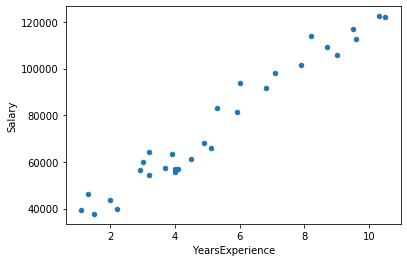

In [5]:
df.plot(kind='scatter',x='YearsExperience',y='Salary')

## Tensorflow

In [6]:
import tensorflow as tf

/home/jackdaniel/ve/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jackdaniel/ve/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jackdaniel/ve/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jackdaniel/ve/ml/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [7]:
batch_size=8

## graphs

linear regression

y=mx+c

In [8]:
np.random.random(2)

array([0.8824149 , 0.41953992])

## Variables

In [9]:
m=tf.Variable(0.76)
c=tf.Variable(0.52)

## Placeholders

In [10]:
xph=tf.placeholder(tf.float32,shape=[batch_size])
yph=tf.placeholder(tf.float32,shape=[batch_size])

In [11]:
y_pred=xph*m+c

## cost function

In [12]:
error=tf.reduce_sum(tf.square(yph-y_pred))

## Optimizer

In [13]:
opt=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=opt.minimize(error)

In [14]:
init=tf.global_variables_initializer()

## Save the model

In [15]:
saver=tf.train.Saver()

## Session

In [16]:
#execute all the operation with session

with tf.Session() as sess:
    sess.run(init)
    batches=1000
    for i in range(batches):
        rand=np.random.randint(len(x),size=batch_size)
        feed={xph:x[rand],yph:y[rand]}
        
        sess.run(train,feed_dict=feed)
    best_m,best_c=sess.run([m,c])
    
    saver.save(sess,'new_models/my_model.ckpt')

## Results

In [17]:
best_m

9313.177

In [18]:
best_c

24976.22

In [19]:
y_test=x*best_m+best_c

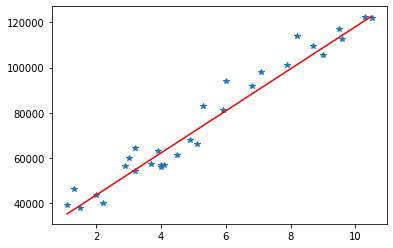

In [20]:
plt.plot(x,y,"*")
plt.plot(x,y_test,"red")

## Load the model

In [21]:
with tf.Session() as sess:
    
    #restore the model
    saver.restore(sess,'new_models/my_model.ckpt')
    
    #fetch the back results
    
    restored_slope,restored_intercept=sess.run([m,c])

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from new_models/my_model.ckpt


In [22]:
best_m

9313.177

In [23]:
best_c

24976.22

In [24]:
y_test=x*best_m+best_c

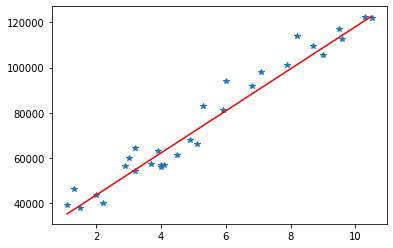

In [25]:
plt.plot(x,y,"*")
plt.plot(x,y_test,"red")